In [1]:
# Import the pandas library for data manipulation and analysis
import pandas as pd
import numpy as np

# Import the matplotlib and seaborn libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots for better aesthetics
sns.set_style("whitegrid")
# Configure plots to display inline in the Jupyter Notebook
%matplotlib inline 

# Load the dataset (replace 'train.csv' if the name is different, but based on your upload, this is correct)
try:
    df = pd.read_csv(r"C:\Users\divph\Desktop\train.csv")  # Added the missing closing quotation mark here
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: train.csv not found. Please ensure the file is in the correct directory.")
except Exception as e:
    print(f"An error occurred: {e}")

Data loaded successfully!


In [2]:
## Display the first 5 rows to understand the structure
print("### First 5 Rows (df.head()) ###")
display(df.head())

## Check the dimensions (rows, columns)
print("\n### Data Dimensions (df.shape) ###")
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

### First 5 Rows (df.head()) ###


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



### Data Dimensions (df.shape) ###
The dataset has 891 rows and 12 columns.


In [3]:
## Get a summary of the DataFrame including data types, non-null values, and memory usage
print("\n### Data Information (df.info()) ###")
df.info()


### Data Information (df.info()) ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
## Summary statistics for numerical columns
print("### Summary Statistics for Numerical Columns (df.describe()) ###")
display(df.describe())

### Summary Statistics for Numerical Columns (df.describe()) ###


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



### Survival Count and Percentage ###
Total Deaths (0): 549 (61.62%)
Total Survivors (1): 342 (38.38%)


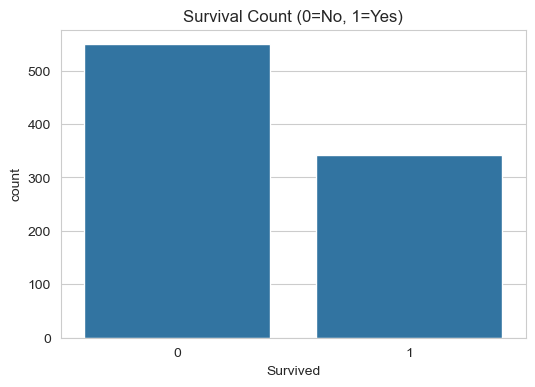

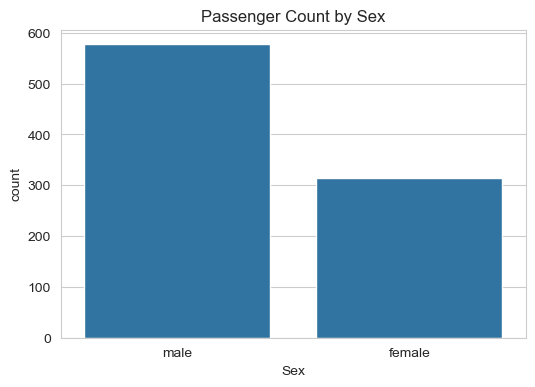

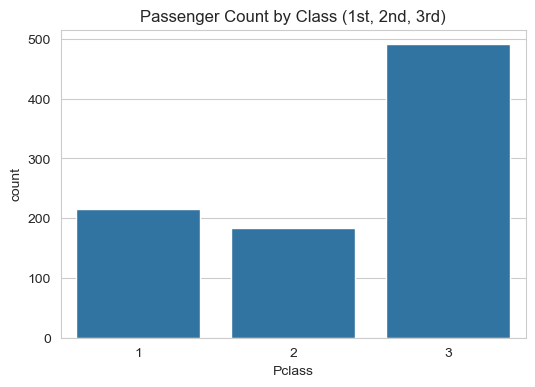

In [5]:
## Survival Rate (Target Variable)
print("\n### Survival Count and Percentage ###")
survival_counts = df['Survived'].value_counts()
survival_percentage = df['Survived'].value_counts(normalize=True) * 100

print(f"Total Deaths (0): {survival_counts[0]} ({survival_percentage[0]:.2f}%)")
print(f"Total Survivors (1): {survival_counts[1]} ({survival_percentage[1]:.2f}%)")

## Plot the survival distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0=No, 1=Yes)')
plt.show()

## Distribution of Sex
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df)
plt.title('Passenger Count by Sex')
plt.show()

## Distribution of Passenger Class (Pclass)
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Count by Class (1st, 2nd, 3rd)')
plt.show()

### Survival Rate by Sex ###


,Sex,Survived
0,female,0.742038
1,male,0.188908


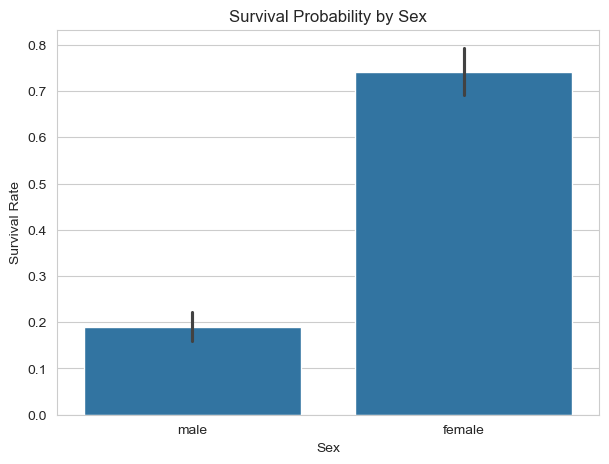

In [6]:
print("### Survival Rate by Sex ###")
display(df.groupby('Sex')['Survived'].mean().reset_index())

plt.figure(figsize=(7, 5))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Probability by Sex')
plt.ylabel('Survival Rate')
plt.show()


### Survival Rate by Passenger Class ###


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


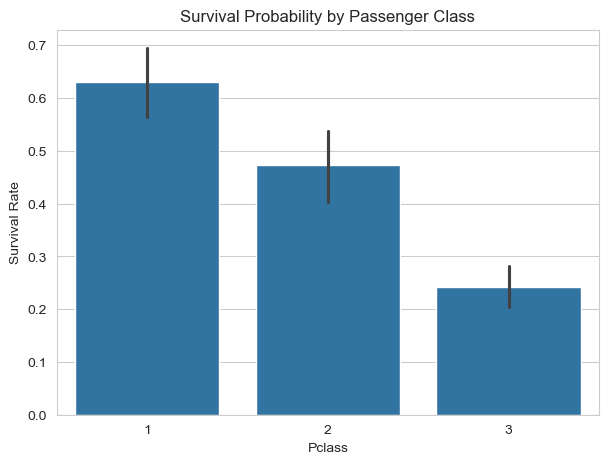

In [7]:
print("\n### Survival Rate by Passenger Class ###")
display(df.groupby('Pclass')['Survived'].mean().reset_index())

plt.figure(figsize=(7, 5))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Probability by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

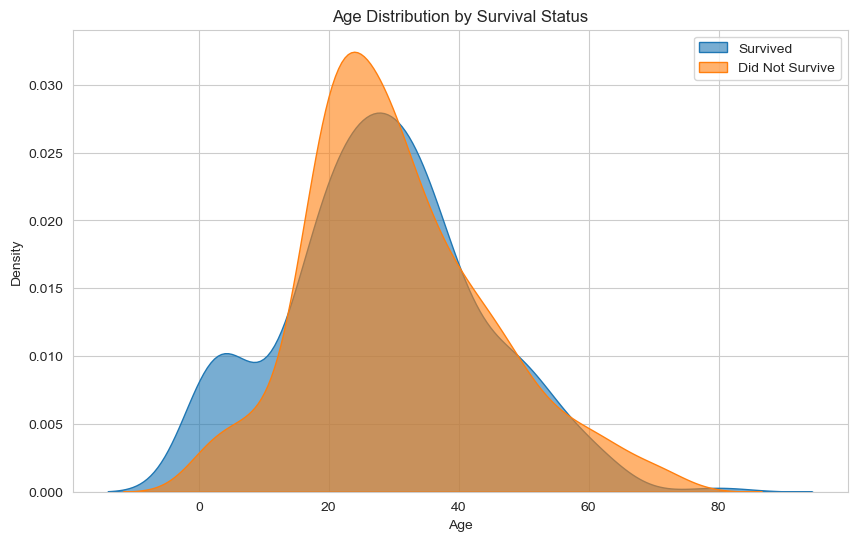

In [8]:
plt.figure(figsize=(10, 6))
# A KDE plot is excellent for comparing distributions of numerical data
sns.kdeplot(df[df['Survived'] == 1]['Age'].dropna(), label='Survived', fill=True, alpha=0.6)
sns.kdeplot(df[df['Survived'] == 0]['Age'].dropna(), label='Did Not Survive', fill=True, alpha=0.6)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.legend()
plt.show()

### Total Missing Values per Column ###
Cabin       687
Age         177
Embarked      2
dtype: int64


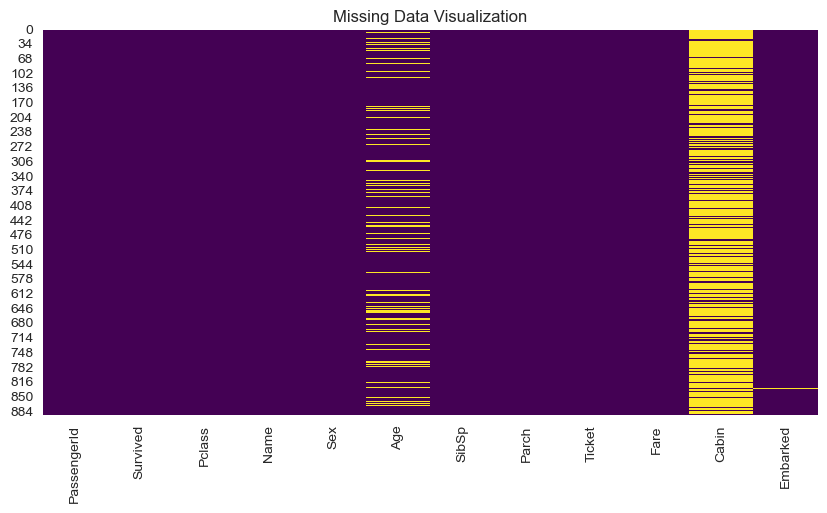

In [9]:
print("### Total Missing Values per Column ###")
# Count the number of NaN/nulls and sort them
missing_data = df.isnull().sum().sort_values(ascending=False)
print(missing_data[missing_data > 0])

# Visualize the missing data
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.show()

In [10]:
# Impute Embarked with the mode (most frequent value)
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)
print(f"Embarked missing values filled with mode: {mode_embarked}")

# Impute Age with the median
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)
print(f"Age missing values filled with median: {median_age}")

# Confirm imputation
print("\n### Final check for missing values in Age and Embarked ###")
print(df[['Age', 'Embarked']].isnull().sum())

Embarked missing values filled with mode: S
Age missing values filled with median: 28.0

### Final check for missing values in Age and Embarked ###
Age         0
Embarked    0
dtype: int64


C:\Users\divph\AppData\Local\Temp\ipykernel_23584\2183579453.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(mode_embarked, inplace=True)
C:\Users\divph\AppData\Local\Temp\ipykernel_23584\2183579453.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

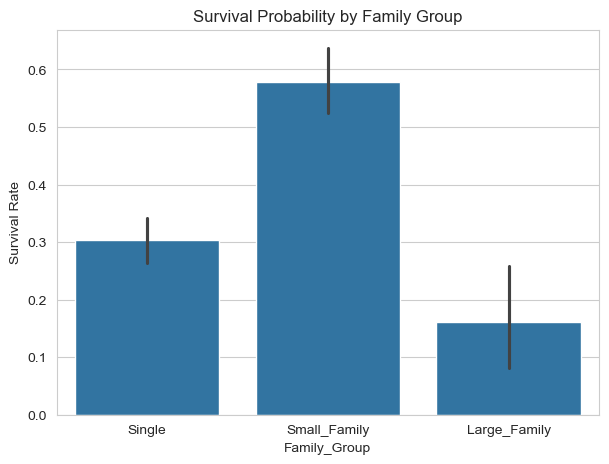

In [11]:
# Create a new feature: Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # +1 for the passenger itself

# Create a category based on Family Size
bins = [0, 1, 4, 11] # Single, Small Family (2-4), Large Family (5+)
labels = ['Single', 'Small_Family', 'Large_Family']
df['Family_Group'] = pd.cut(df['FamilySize'], bins=bins, labels=labels, right=True)

# Plot survival by Family Group
plt.figure(figsize=(7, 5))
sns.barplot(x='Family_Group', y='Survived', data=df)
plt.title('Survival Probability by Family Group')
plt.ylabel('Survival Rate')
plt.show()

In [12]:
print("### Final Glimpse of the Data with New Features ###")
display(df.head())

print("\n### Final DataFrame Info ###")
df.info()

### Final Glimpse of the Data with New Features ###


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Family_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small_Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small_Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Single
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small_Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Single



### Final DataFrame Info ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Name          891 non-null    object  
 4   Sex           891 non-null    object  
 5   Age           891 non-null    float64 
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Cabin         204 non-null    object  
 11  Embarked      891 non-null    object  
 12  FamilySize    891 non-null    int64   
 13  Family_Group  891 non-null    category
dtypes: category(1), float64(2), int64(6), object(5)
memory usage: 91.6+ KB
